In [41]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm.auto import tqdm


In [42]:
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def rosenbrock_grad(params):
    x, y = params[0], params[1]
    dx = 2 * (x - 1) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return torch.tensor([dx, dy])

In [43]:
def gradient_descent(learning_rate, max_iter, initial_params, epsilon=1e-4):
  # inicialização
  params = initial_params.clone().detach()
  loss_history = []
  hyperparams_history = [params.detach().clone()]

  for i in tqdm(range(max_iter)):
    # forward
    loss = rosenbrock(params[0], params[1])
    loss_history.append(loss.detach().item())

    # backward
    gradient = rosenbrock_grad(params)

    params -= learning_rate * gradient

    hyperparams_history.append(params.detach().clone())

    if torch.norm(gradient) < epsilon:
      print(f"convergiu após {i + 1} iterações")
      print(f"Ponto final: {params[0]}, {params[1]} \n Erro: {loss}")
      break
  return torch.stack(hyperparams_history), loss_history, i + 1



In [ ]:
def heavy_ball_gd(learning_rate, beta, max_iter, initial_params, epsilon=1e-4):
  # inicialização
  params = initial_params.clone().detach()
  params_history = [params.detach().clone()]
  loss_history_hb = []
  previous_params = params.detach().clone() 
  heavy_ball_momentum = 0
  for i in tqdm(range(max_iter)):
    # forward
    loss = rosenbrock(params[0], params[1])
    loss_history_hb.append(loss)
    # backward
    loss.backward()
    gradient = rosenbrock_grad(params)
    current_params = params.clone()
    heavy_ball_momentum = beta * (params - previous_params)
    params = params - learning_rate * gradient + heavy_ball_momentum
    previous_params = current_params
    params_history.append(params.detach().clone())
    if torch.norm(gradient) < epsilon:
      print(f"convergiu após {i + 1} iterações com learning rate de {learning_rate} e beta {beta}")
      print(f"Ponto final: {params[0]}, {params[1]}")
      print(f"Erro: {loss}")
      break
  return torch.stack(params_history), loss_history_hb, i + 1


In [45]:
def heavy_ball_gd_with_backpropagation(learning_rate, beta, max_iter, initial_params, epsilon=1e-4):
  # inicialização
  params = initial_params.clone().detach().requires_grad_(True)
  params_history = [params.detach().clone()]
  loss_history_hb = []
  previous_params = params.detach().clone() 
  heavy_ball_momentum = 0
  for i in tqdm(range(max_iter)):
    if params.grad is not None:
      params.grad.zero_()
    # forward
    loss = rosenbrock(params[0], params[1])
    loss_history_hb.append(loss)

    # backward
    loss.backward()
    
    with torch.no_grad():
      current_params = params.clone()
      heavy_ball_momentum = beta * (params - previous_params)
      params -= learning_rate * params.grad - heavy_ball_momentum
      previous_params = current_params
    
    params_history.append(params.detach().clone())

    if torch.norm(params.grad) < epsilon:
      print(f"convergiu após {i + 1} iterações com learning rate de {learning_rate} e beta {beta}")
      print(f"Ponto final: {params[0]}, {params[1]}")
      print(f"Erro: {loss}")
      break
  return torch.stack(params_history), loss_history_hb, i + 1

In [46]:
def momentum_optimizer(start_point, learning_rate, beta, n_iterations=1000, tolerance=1e-6):
    trajectory = [start_point]
    velocities = [np.array([0.0, 0.0])]
    values = [rosenbrock(start_point[0], start_point[1])]
    
    current_point = start_point.copy()
    num_of_its = 0

    for i in range(n_iterations):
        grad = rosenbrock_grad(current_point)
        grad = np.array(grad, dtype=float)
        
        velocity = beta * velocities[-1] + (1 - beta) * grad
        current_point = current_point - learning_rate * velocity
        
        trajectory.append(current_point.copy())
        velocities.append(velocity.copy())
        values.append(rosenbrock(current_point[0], current_point[1]))
        if np.linalg.norm(grad) < tolerance:
            # print(f"Convergiu com {i + 1} iterações")
            num_of_its = i + 1
            break
    
    return np.stack(trajectory), np.array(values), num_of_its

  0%|          | 0/100000 [00:00<?, ?it/s]

convergiu após 11246 iterações com learning rate de 0.001661 e beta 0.1
Ponto final: 0.9998891353607178, 0.9997777938842773
Erro: 1.2334822940829326e-08


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

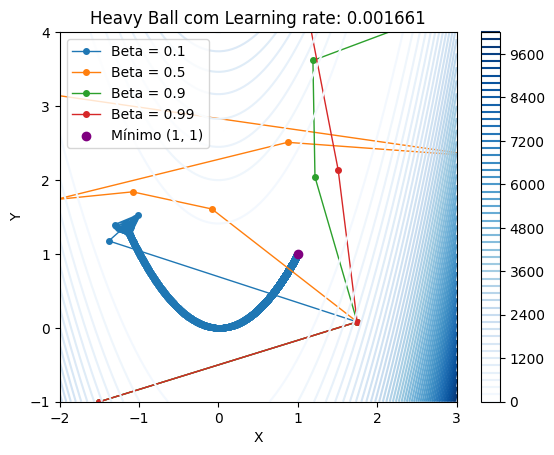

In [ ]:
learning_rate_gd = 0.001661
learning_rate_hb = 0.001661
# learning_rate_hb = 0.0013231
max_iter = 100000
# beta = 0.96
# beta = [0.1, 0.5, 0.9, 0.99]
beta = [0.1, 0.5, 0.9, 0.99]
epsilon = 1e-4
initial_params = torch.Tensor([-1.5, -1])
loss_history_hb = None
params_history_heavy_ball = None


# learning_rate_all = 0.0003
# beta = 0.9
# params_history_gd, loss_history_gd, num_iters_gd = gradient_descent(learning_rate=learning_rate_all, max_iter=max_iter, initial_params=initial_params, epsilon=epsilon)
# plt.plot(params_history_gd.numpy()[:, 0], params_history_gd.numpy()[:, 1], marker='o', linestyle='-', label="Trad GD", markersize=4, linewidth=1)


# params_history_heavy_ball, loss_history_hb, num_iters_hb = heavy_ball_gd(learning_rate=learning_rate_hb, beta=beta, max_iter=max_iter, initial_params=initial_params, epsilon=epsilon)
# plt.plot(params_history_heavy_ball.numpy()[:, 0], params_history_heavy_ball.numpy()[:, 1], marker='o', linestyle='-', label=f"Heavy-Ball GD", markersize=4, linewidth=1)

for b in beta:
    params_history_heavy_ball, loss_history_hb, num_iters_hb = heavy_ball_gd_with_backpropagation(learning_rate=learning_rate_hb, beta=b, max_iter=max_iter, initial_params=initial_params, epsilon=epsilon)
    # plt.semilogy(range(num_iters_hb), loss_history_hb, label=f"Beta = {b}", linewidth=1)
    # if b == 0.99:
    plt.plot(params_history_heavy_ball.numpy()[:, 0], params_history_heavy_ball.numpy()[:, 1], marker='o', linestyle='-', label=f"Beta = {b}", markersize=4, linewidth=1)

"""
initial_params = np.array([-1.5, -1.5])
learning_rate_hb = 0.001
for b in beta:
    params_history_heavy_ball, loss_history_hb, num_of_its = momentum_optimizer(start_point=initial_params, learning_rate=learning_rate_hb, beta=b, n_iterations=max_iter, tolerance=epsilon)
    plt.plot(params_history_heavy_ball[:, 0], params_history_heavy_ball[:, 1], marker='o',linestyle='-', label=f"beta: {b}", markersize=4, linewidth=2)
    print(f"For beta = {b}: \n Last params: {params_history_heavy_ball[-1]} \n Last loss: {loss_history_hb[-1]} \n num of its = {num_of_its}")

"""
# params_history_gd, num_iters_gd = gradient_descent(learning_rate=learning_rate_gd, max_iter=max_iter, initial_params=initial_params, epsilon=epsilon)
# params_history_heavy_ball, loss_history_hb, num_iters_hb = heavy_ball_gd(learning_rate=learning_rate_hb, beta=beta, max_iter=max_iter, initial_params=initial_params, epsilon=epsilon)
x_lim = [-2, 3]
y_lim = [-1, 4]

x_values = np.linspace(x_lim[0], x_lim[1], 100)
y_values = np.linspace(y_lim[0], y_lim[1], 100)

x, y = np.meshgrid(x_values, y_values)

z = rosenbrock(x, y)
contour = plt.contour(x, y, z, levels=50, cmap='Blues')
if contour is not None:
    plt.colorbar(contour)

# plt.plot(params_history_heavy_ball.numpy()[:, 0], params_history_heavy_ball.numpy()[:, 1], marker='o', linestyle='-', color='orange', label='Heavy Ball Gradient Descent', markersize=4, linewidth=1)
# plt.plot(params_history_gd.numpy()[:, 0], params_history_gd.numpy()[:, 1], marker='o', linestyle='-', color='purple', label='Gradient Descent', markersize=4, linewidth=2)
plt.scatter([1.0], [1.0], color='purple', zorder=5, label='Mínimo (1, 1)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Heavy Ball com Learning rate: {learning_rate_hb}')
plt.legend()
plt.xlim(x_lim[0], x_lim[1])
plt.ylim(y_lim[0], y_lim[1])

# plt.xlabel("Número de Iterações")
# plt.ylabel("f(xk)")
# plt.title("Convergência GD vs Heavy-ball GD")
# plt.legend()
# plt.grid(True, alpha=0.3, linestyle='--')
# plt.ylim(bottom=1e-3, top = 1e4)
# plt.xlim(right=399)

plt.show()
